In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')
df.head()

<ipython-input-2-cfdfd9de3f20>:3: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
#Checking for missing data: 

missing_data=df.isnull()
missing_data.head(10)

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Serial Number
Serial Number
False    1097629
Name: count, dtype: int64

List Year
List Year
False    1097629
Name: count, dtype: int64

Date Recorded
Date Recorded
False    1097627
True           2
Name: count, dtype: int64

Town
Town
False    1097629
Name: count, dtype: int64

Address
Address
False    1097578
True          51
Name: count, dtype: int64

Assessed Value
Assessed Value
False    1097629
Name: count, dtype: int64

Sale Amount
Sale Amount
False    1097629
Name: count, dtype: int64

Sales Ratio
Sales Ratio
False    1097629
Name: count, dtype: int64

Property Type
Property Type
False    715183
True     382446
Name: count, dtype: int64

Residential Type
Residential Type
False    699240
True     398389
Name: count, dtype: int64

Non Use Code
Non Use Code
True     784178
False    313451
Name: count, dtype: int64

Assessor Remarks
Assessor Remarks
True     926401
False    171228
Name: count, dtype: int64

OPM remarks
OPM remarks
True     1084598
False      13031
Name: count, dtype

In [4]:
#Handling Missing Data & Data Cleaning

df.drop(columns=['Non Use Code','Assessor Remarks', 'OPM remarks', 'Location'],inplace=True)
df.head(10)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family
6,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family
7,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family
8,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo
9,2020360,2020,08/10/2021,Berlin,94 PERCIVAL AVE,140600.0,190790.0,0.736900,Residential,Single Family


In [5]:
df['Date Recorded'].value_counts().idxmax()

'07/01/2005'

In [6]:
df['Date Recorded']=df['Date Recorded'].fillna(df['Date Recorded'].mode()[0])

In [7]:
df['Residential Type'].value_counts().idxmax()

'Single Family'

In [8]:
df['Residential Type']=df['Residential Type'].fillna(df['Residential Type'].mode()[0])

In [9]:
num_address = df['Address'].astype(str).str.match(r'^\d+$')
print(df[num_address])

         Serial Number  List Year Date Recorded          Town  Address  \
93              200630       2020    02/16/2021     Greenwich  2350000   
986             201699       2020    09/08/2021     Greenwich   720000   
6322            200260       2020    09/16/2021  East Windsor    88510   
9259            200530       2020    01/20/2021     Greenwich  1050000   
10741           200579       2020    02/03/2021     Greenwich  2195000   
...                ...        ...           ...           ...      ...   
1038107         211751       2021    06/28/2022     Waterbury   157700   
1047749         210374       2021    12/06/2021       Norwalk   294470   
1053151         210029       2021    11/02/2021      Portland   426000   
1055597         211494       2021    08/17/2022       Norwalk   647000   
1074777         220545       2022    04/20/2023       Milford   021156   

         Assessed Value  Sale Amount  Sales Ratio Property Type  \
93            1964480.0    2350000.0       0

In [10]:
df.loc[df['Address'].astype(str).str.match(r'^\d+$'), 'Address'] = np.nan

df.head(94)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Single Family
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family
...,...,...,...,...,...,...,...,...,...,...
89,200120,2020,11/18/2020,Glastonbury,1326 HEBRON AVE,58500.0,72500.0,0.8068,Vacant Land,Single Family
90,200095,2020,06/07/2021,Goshen,44 ROCKWALL COURT,322150.0,628000.0,0.5129,Residential,Single Family
91,20000214,2020,07/13/2021,Granby,15 WINDMILL DR,112350.0,199000.0,0.5645,Residential,Condo
92,20000275,2020,09/20/2021,Granby,30 FIRETOWN RD,154210.0,315000.0,0.4895,Public Utility,Single Family


In [11]:
#Standardizing Categorical Data: Property Type Correction

valid_property_types = {'Apartments', 'Commercial', 'Industrial', 'Residential', 'Public Utility', 'Vacant Land'}

incorrect_rows = df[~df["Property Type"].isin(valid_property_types)]
print(incorrect_rows[["Property Type", "Residential Type"]].head())  # Display a few incorrect rows


most_frequent_property_type = df[df["Property Type"].isin(valid_property_types)]["Property Type"].mode()[0]
print("Most frequent Property Type:", most_frequent_property_type)


df.loc[~df["Property Type"].isin(valid_property_types), "Property Type"] = most_frequent_property_type

print(df["Property Type"].value_counts())


    Property Type Residential Type
274           NaN    Single Family
275           NaN    Single Family
278           NaN    Single Family
280           NaN    Single Family
281           NaN    Single Family
Most frequent Property Type: Residential
Property Type
Residential       1081686
Vacant Land          7824
Commercial           5987
Apartments           1327
Industrial            795
Public Utility         10
Name: count, dtype: int64


In [12]:
df = df.dropna(subset=["Address"])

In [13]:
#Final Check of Missing Values 

missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Serial Number
Serial Number
False    1097507
Name: count, dtype: int64

List Year
List Year
False    1097507
Name: count, dtype: int64

Date Recorded
Date Recorded
False    1097507
Name: count, dtype: int64

Town
Town
False    1097507
Name: count, dtype: int64

Address
Address
False    1097507
Name: count, dtype: int64

Assessed Value
Assessed Value
False    1097507
Name: count, dtype: int64

Sale Amount
Sale Amount
False    1097507
Name: count, dtype: int64

Sales Ratio
Sales Ratio
False    1097507
Name: count, dtype: int64

Property Type
Property Type
False    1097507
Name: count, dtype: int64

Residential Type
Residential Type
False    1097507
Name: count, dtype: int64



In [14]:
#Correct data format

df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
dtype: object

In [15]:
df['Date Recorded']=pd.to_datetime(df['Date Recorded'])
df['Assessed Value']=df['Assessed Value'].astype('int')
df['Sale Amount']=df['Sale Amount'].astype('int')
df['Sales Ratio %']=df['Sales Ratio']*100

In [16]:
df.dtypes 

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value               int32
Sale Amount                  int32
Sales Ratio                float64
Property Type               object
Residential Type            object
Sales Ratio %              float64
dtype: object

In [17]:
df['Sales Ratio'] = df['Sales Ratio'].round(2)

df['Sales Ratio %'] = df['Sales Ratio %'].round(2)

df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000,248400,0.54,Residential,Single Family,53.54
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500,239900,0.46,Residential,Three Family,46.06
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.46,Commercial,Single Family,46.30
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400,202500,0.63,Residential,Two Family,62.91
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640,400000,0.54,Residential,Single Family,54.41


In [18]:
#Binning

bins=np.linspace(min(df['Sale Amount']), max(df['Sale Amount']), 4)
group_names=['Low', 'Medium', 'High']
df['Sales Amount Binned']=pd.cut(df['Sale Amount'], bins, labels=group_names, include_lowest=True)
df['Sales Amount Binned'].value_counts()

Sales Amount Binned
High      1097506
Low             1
Medium          0
Name: count, dtype: int64

In [19]:
#after running this command, the outlier was indicated

df['Sale Amount'].min()
df[df['Sale Amount'] < 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned
59788,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530,-2147483648,0.0,Apartments,Single Family,0.04,Low


In [20]:
df = df[df['Sale Amount'] != -2147483648]

In [21]:
bins=np.linspace(min(df['Sale Amount']), max(df['Sale Amount']), 4)
group_names=['Low', 'Medium', 'High']
df['Sales Amount Binned']=pd.cut(df['Sale Amount'], bins, labels=group_names, include_lowest=True)
df['Sales Amount Binned'].value_counts()

Sales Amount Binned
Low       1097474
Medium         22
High           10
Name: count, dtype: int64

In [22]:
#let's check if there are suspicious numbers in Medium and High sales amounts as well
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000,248400,0.54,Residential,Single Family,53.54,Low
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500,239900,0.46,Residential,Three Family,46.06,Low
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.46,Commercial,Single Family,46.30,Low
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400,202500,0.63,Residential,Two Family,62.91,Low
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640,400000,0.54,Residential,Single Family,54.41,Low


In [23]:
df_medium_sales = df[df['Sales Amount Binned'] == 'Medium']
df_medium_sales

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned
39677,2002096,2020,2021-07-12,Stamford,180 200 BROAD STREET,87850000,154000000,0.57,Commercial,Single Family,57.04,Medium
65571,20200102,2020,2021-09-28,Willington,7 TOLLAND TURNPIKE ROAD,112040,194149073,0.00,Residential,Three Family,0.06,Medium
385891,60428,2006,2007-03-06,Greenwich,100 W PUTNAM AVE,69421380,136700000,0.51,Residential,Single Family,50.78,Medium
390479,60270,2006,2007-01-12,Greenwich,EAST PUTNAM AVE,122935400,181700000,0.68,Residential,Single Family,67.66,Medium
393538,60769,2006,2007-06-05,Greenwich,55 RAILROAD AVE,70057960,142500000,0.49,Residential,Single Family,49.16,Medium
676988,13058,2013,2013-10-10,Stamford,151 GREENWICH AVENUE,62253600,152384149,0.41,Residential,Single Family,40.85,Medium
680067,13371,2013,2013-12-16,Stamford,101 WASHINGTON BOULEVARD,76228710,135000000,0.56,Residential,Single Family,56.47,Medium
681361,13057,2013,2013-10-10,Stamford,151 GREENWICH AVENUE,58387880,152384149,0.38,Residential,Single Family,38.32,Medium
681794,13059,2013,2013-10-10,Stamford,151 GREENWICH AVENUE,33187350,152384149,0.22,Residential,Single Family,21.78,Medium
853749,170888,2017,2018-08-08,Hamden,0 HAMDEN HILLS DR,55931890,136500000,0.41,Residential,Single Family,40.97,Medium


In [24]:
#medium sales look fine, let's check high

df_high_sales = df[df['Sales Amount Binned'] == 'High']
df_high_sales

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned
60847,20200078,2020,2021-07-06,Willington,224 RIVER ROAD,223070,318790019,0.00,Residential,Single Family,0.07,High
799678,160393,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110,395500000,0.13,Residential,Single Family,12.85,High
801991,160389,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090,395500000,0.03,Residential,Single Family,2.74,High
825265,160390,2016,2016-12-06,Stamford,200 HENRY STREET # 4,10935790,395500000,0.03,Residential,Single Family,2.77,High
835261,160386,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510,395500000,0.14,Residential,Single Family,14.20,High
839137,160394,2016,2016-12-06,Stamford,301-401 COMMONS PARK SOUTH # C,92447590,395500000,0.23,Residential,Single Family,23.37,High
844524,160388,2016,2016-12-06,Stamford,200 HENRY STREET # 2,3200720,395500000,0.01,Residential,Single Family,0.81,High
845362,160391,2016,2016-12-06,Stamford,200 HENRY STREET # 5,3307410,395500000,0.01,Residential,Single Family,0.84,High
847141,160387,2016,2016-12-06,Stamford,200 HENRY STREET # 1,10669060,395500000,0.03,Residential,Single Family,2.70,High
847829,160392,2016,2016-12-06,Stamford,110 TOWNE STREET,23290450,395500000,0.06,Residential,Single Family,5.89,High


In [25]:
#we can see repeating number of 395500000 in Stamford city. After researching, it seems like  big company purchased buildings 
#in the same area that mostly consist of Residencies for Single Families. Instead of deleting the raws, lets devide the sale amount to distribute it across raws.

condition = (df['Town'] == 'Stamford') & (df['Sale Amount'] == 395500000)

divided_amount = 395500000/8

df.loc[condition, 'Sale Amount'] = divided_amount

In [26]:
bins=np.linspace(min(df['Sale Amount']), max(df['Sale Amount']), 4)
group_names=['Low', 'Medium', 'High']
df['Sales Amount Binned']=pd.cut(df['Sale Amount'], bins, labels=group_names, include_lowest=True)
df['Sales Amount Binned'].value_counts()

Sales Amount Binned
Low       1097467
Medium         35
High            4
Name: count, dtype: int64

In [27]:
df_high_sales = df[df['Sales Amount Binned'] == 'High']
df_high_sales

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned
60847,20200078,2020,2021-07-06,Willington,224 RIVER ROAD,223070,318790019,0.00,Residential,Single Family,0.07,High
993803,190201,2019,2019-11-13,Waterbury,64 ROBBINS ST,142858700,230043624,0.62,Residential,Single Family,62.10,High
1047544,2100475,2021,2021-12-02,Stamford,695 EAST MAIN STREET,25900000,235000000,0.11,Vacant Land,Single Family,11.02,High
1050833,2100476,2021,2021-12-02,Stamford,695 EAST MAIN STREET,87314010,235000000,0.37,Commercial,Single Family,37.15,High


In [28]:
bins=np.linspace(min(df['Assessed Value']), max(df['Assessed Value']), 4)
group_names=['Low', 'Medium', 'High']
df['Assessed Value Amount Binned']=pd.cut(df['Assessed Value'], bins, labels=group_names, include_lowest=True)
df['Assessed Value Amount Binned'].value_counts()

Assessed Value Amount Binned
Low       1097505
High            1
Medium          0
Name: count, dtype: int64

In [29]:
#after running this command, the outlier was indicated

df[df['Assessed Value'] == df['Assessed Value'].max()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned,Assessed Value Amount Binned
846941,170909,2017,2018-08-15,Hamden,42 WARNER ST,881510000,4680000,188.36,Residential,Condo,18835.68,Low,High


In [30]:
df = df[df['Assessed Value'] != 881510000]

In [31]:
bins=np.linspace(min(df['Assessed Value']), max(df['Assessed Value']), 4)
group_names=['Low', 'Medium', 'High']
df['Assessed Value Amount Binned']=pd.cut(df['Assessed Value'], bins, labels=group_names, include_lowest=True)
df['Assessed Value Amount Binned'].value_counts()

Assessed Value Amount Binned
Low       1097130
Medium        363
High           12
Name: count, dtype: int64

In [32]:
df_high_assessed = df[df['Assessed Value Amount Binned'] == 'High']
df_high_assessed

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned,Assessed Value Amount Binned
31483,2000592,2020,2020-12-16,Stamford,400 ATLANTIC STREET,114924210,100000000,1.15,Commercial,Single Family,114.92,Low,High
390479,60270,2006,2007-01-12,Greenwich,EAST PUTNAM AVE,122935400,181700000,0.68,Residential,Single Family,67.66,Medium,High
430081,60271,2006,2007-01-12,Greenwich,EAST PUTNAM AVE,122935400,48300000,2.55,Residential,Single Family,254.52,Low,High
547372,10272,2010,2011-05-11,Hamden,642 NEWHALL ST,110670208,208900,529.78,Residential,Single Family,52977.60,Low,High
759335,150017,2015,2015-10-19,Suffield,TAINTOR ST,138958820,40356,3443.32,Residential,Single Family,344332.49,Low,High
780936,150016,2015,2015-10-19,Suffield,TAINTOR ST,138958820,90096,1542.34,Residential,Single Family,154234.17,Low,High
797898,150018,2015,2015-10-19,Suffield,TAINTOR ST,138958820,45319,3066.24,Residential,Single Family,306623.76,Low,High
811169,160270,2016,2016-12-21,New Britain,100 GRAND ST,131072830,120000,1092.27,Residential,Single Family,109227.36,Low,High
813514,160093,2016,2016-11-07,Greenwich,51 WEAVER ST,103207510,130000000,0.79,Residential,Single Family,79.39,Medium,High
921618,1801122,2018,2019-06-04,Stamford,600 WASHINGTON BLVD,105438300,163000000,0.65,Residential,Single Family,64.68,Medium,High


In [33]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned,Assessed Value Amount Binned
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000,248400,0.54,Residential,Single Family,53.54,Low,Low
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500,239900,0.46,Residential,Three Family,46.06,Low,Low
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.46,Commercial,Single Family,46.30,Low,Low
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400,202500,0.63,Residential,Two Family,62.91,Low,Low
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640,400000,0.54,Residential,Single Family,54.41,Low,Low


In [34]:
#Adding new columns of differences between sales and assessed value

df["Increase %"] = ((df["Sale Amount"] - df["Assessed Value"]) / df["Assessed Value"]) * 100
df['Increase %'] = df['Increase %'].round(2)

In [35]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Sales Ratio %,Sales Amount Binned,Assessed Value Amount Binned,Increase %
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000,248400,0.54,Residential,Single Family,53.54,Low,Low,86.77
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500,239900,0.46,Residential,Three Family,46.06,Low,Low,117.10
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000,0.46,Commercial,Single Family,46.30,Low,Low,115.95
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400,202500,0.63,Residential,Two Family,62.91,Low,Low,58.95
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640,400000,0.54,Residential,Single Family,54.41,Low,Low,83.79


In [36]:
#Changing the order of columns

df.columns = df.columns.str.replace(" ", "_")

In [37]:
df= df.sort_values(by='List_Year', ascending=True)

In [38]:
desired_order = [
    'Serial_Number', 'List_Year', 'Date_Recorded', 'Town', 'Address', 'Assessed_Value', 'Assessed_Value_Amount_Binned', 'Sale_Amount', 'Sales_Amount_Binned', 'Sales_Ratio', 'Sales_Ratio_%', 'Increase_%']


other_cols = [col for col in df.columns if col not in desired_order]

new_order = desired_order + other_cols

df = df[new_order]

print(df.columns)

Index(['Serial_Number', 'List_Year', 'Date_Recorded', 'Town', 'Address',
       'Assessed_Value', 'Assessed_Value_Amount_Binned', 'Sale_Amount',
       'Sales_Amount_Binned', 'Sales_Ratio', 'Sales_Ratio_%', 'Increase_%',
       'Property_Type', 'Residential_Type'],
      dtype='object')


In [40]:
df = df.rename(columns={'Assessed_Value': 'Assessed_Value (USD)', 'Sale_Amount': 'Sale_Amount (USD)'})
df.head()

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value (USD),Assessed_Value_Amount_Binned,Sale_Amount (USD),Sales_Amount_Binned,Sales_Ratio,Sales_Ratio_%,Increase_%,Property_Type,Residential_Type
91430,10514,2001,2002-03-06,Hamden,11 FURMAN RD,72170,Low,139000,Low,0.52,51.92,92.60,Residential,Single Family
81608,10061,2001,2001-11-16,Guilford,81 CORNWALL LN,161770,Low,340000,Low,0.48,47.58,110.17,Residential,Single Family
81607,10223,2001,2002-03-07,Cheshire,116 BRADFORD DR,94360,Low,166000,Low,0.57,56.84,75.92,Residential,Single Family
81606,10796,2001,2002-04-15,Bristol,371 EMMETT ST UT 44,30240,Low,68900,Low,0.44,43.89,127.84,Residential,Single Family
81605,10493,2001,2002-02-22,Milford,155 CLARK ST U C,65940,Low,169900,Low,0.39,38.81,157.66,Residential,Single Family


Matplotlib is building the font cache; this may take a moment.


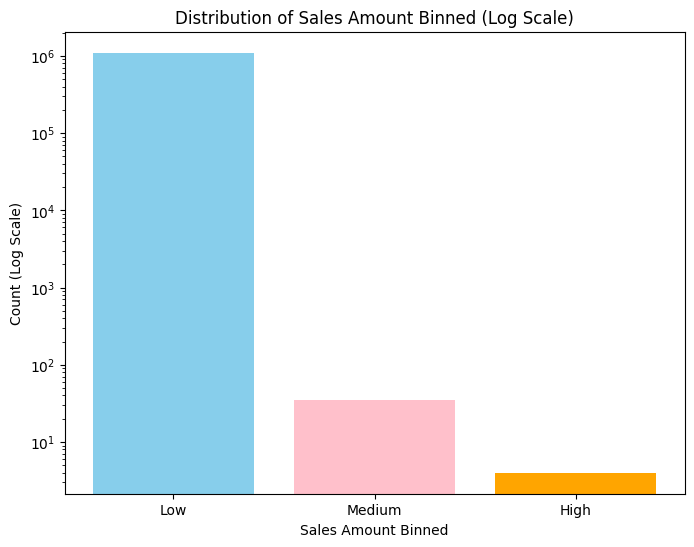

In [41]:
#Binning Visualisation:

import matplotlib.pyplot as plt
import numpy as np

sales_data = {'Low': 1097467, 'Medium': 35, 'High': 4}
categories = list(sales_data.keys())
counts = list(sales_data.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'pink', 'orange'])
plt.yscale('log')  
plt.xlabel('Sales Amount Binned')
plt.ylabel('Count (Log Scale)')
plt.title('Distribution of Sales Amount Binned (Log Scale)')
plt.show()

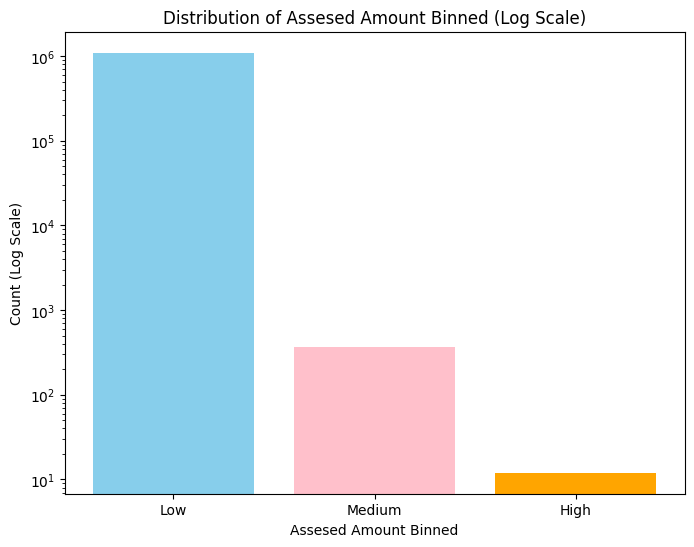

In [42]:
assesed_data = {'Low': 1097130, 'Medium': 363, 'High': 12}
categories = list(assesed_data.keys())
counts = list(assesed_data.values())

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'pink', 'orange'])
plt.yscale('log')  
plt.xlabel('Assesed Amount Binned')
plt.ylabel('Count (Log Scale)')
plt.title('Distribution of Assesed Amount Binned (Log Scale)')
plt.show()

In [43]:
#Saving CSV file 

df.to_csv('Cleaned_Dataset_Real_Estate_Sales_2001_2022.csv', index=False, encoding='utf-8-sig')

In [44]:
if not df.empty:
    df.to_csv('updates_sales.csv', index=False)
    print("File saved successfully.")
else:
    print("DataFrame is empty!")

File saved successfully.


In [45]:
with open('updates_sales.csv', 'r') as f:
    print(f.read(500))

Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value (USD),Assessed_Value_Amount_Binned,Sale_Amount (USD),Sales_Amount_Binned,Sales_Ratio,Sales_Ratio_%,Increase_%,Property_Type,Residential_Type
10514,2001,2002-03-06,Hamden,11 FURMAN RD,72170,Low,139000,Low,0.52,51.92,92.6,Residential,Single Family
10061,2001,2001-11-16,Guilford,81 CORNWALL LN,161770,Low,340000,Low,0.48,47.58,110.17,Residential,Single Family
10223,2001,2002-03-07,Cheshire,116 BRADFORD DR,94360,Low,166000,Low,0.57,56.
